In [2]:
import numpy as np
import skimage.io as io
import skimage
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import cv2
import math
import imutils



In [9]:

def draw_shaps(path,Lmin,Smin):
    I = io.imread(path)

    if I.shape[2] == 3:
        I =  cv2.cvtColor(I, cv2.COLOR_RGB2RGBA);

        
        
    resized = imutils.resize(I, width=300)
    ratio = I.shape[0] / float(resized.shape[0])
    
    # convert the resized image to grayscale, blur it slightly,
    # and threshold it
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    
    plt.rcParams['figure.dpi'] = 100
    plt.axis('off')
    plt.imshow(gray)
    plt.show()
    
    
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    plt.rcParams['figure.dpi'] = 100
    plt.axis('off')
    plt.imshow(blurred)
    plt.show()
    
    thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]
    
    plt.rcParams['figure.dpi'] = 100
    plt.axis('off')
    plt.imshow(thresh)
    plt.show()
    
    # find contours in the thresholded image and initialize the
    # shape detector
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    print("cnts",len(cnts))
    for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.04 * peri, True)

        #print(peri,approx)


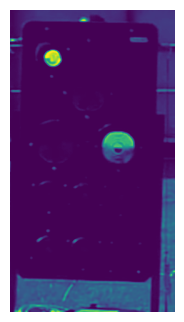

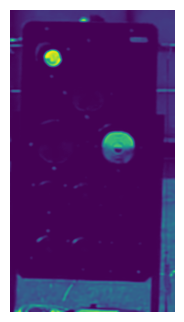

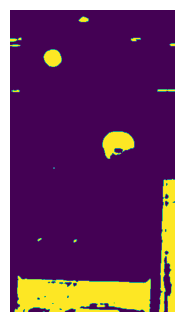

cnts 16


In [10]:
draw_shaps('data/drohne-signals/traffic_light0032.png',5,15)